## Inspect data

In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GroupShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

In [22]:
# Load pre-extracted feature data
data = pd.read_csv('./data/HR_data_2.csv')
print("Shape:", data.shape)
print("Features:", data.columns.tolist())
data.head()

Shape: (312, 71)
Features: ['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT', 'Round', 'Phase', 'Individual', 'Puzzler', 'original_ID', 'raw_da

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [23]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [24]:
# Define rating columns
rating_cols = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active']

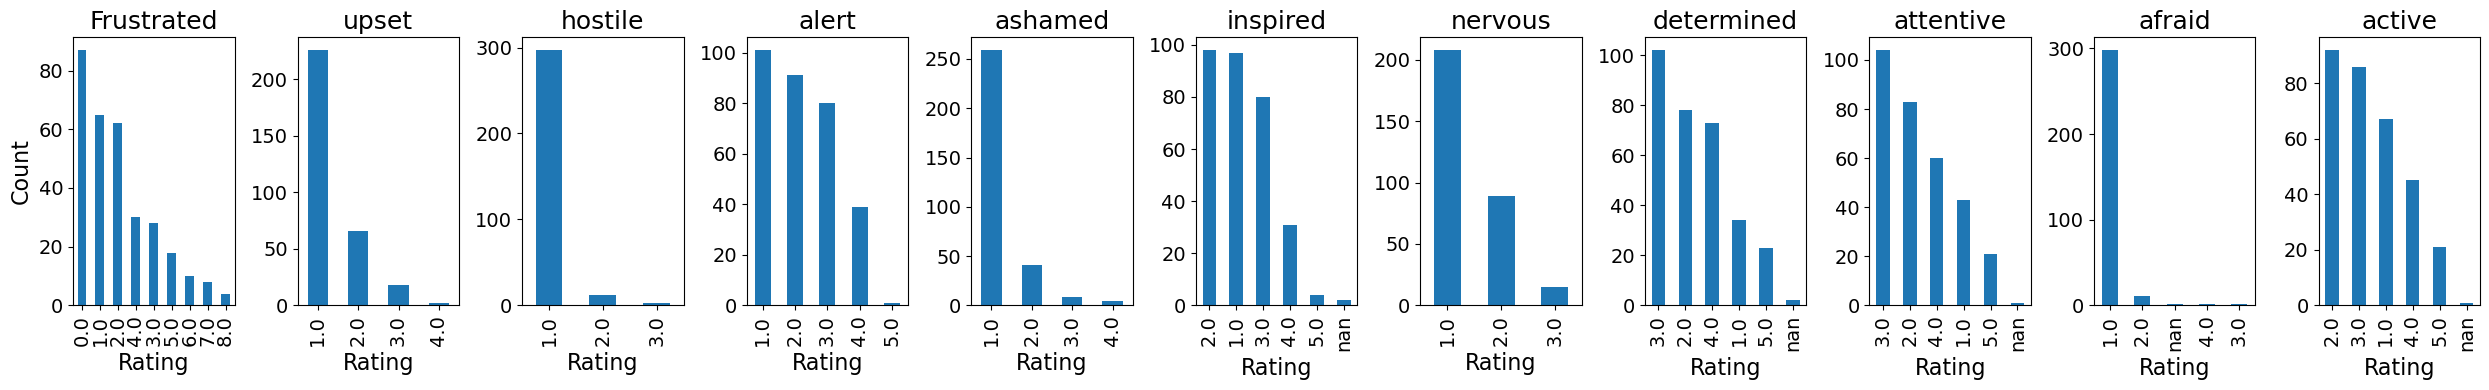

In [25]:
# Plot the distributions of rating column
fig, axes = plt.subplots(nrows = 1, ncols = len(rating_cols), figsize = (25, 4))

for i, col in enumerate(rating_cols):
    data[col].value_counts(dropna = False).plot(kind='bar', ax = axes[i])
    axes[i].set_title(f"{col}", fontsize = 18)
    axes[i].set_xlabel("Rating", fontsize = 16)
    axes[0].set_ylabel("Count", fontsize = 16)
    axes[i].tick_params(axis = 'both', labelsize = 14)

plt.tight_layout()
plt.show()

In [26]:
# Impute NaNs with 0.0 in just those columns
data[rating_cols] = data[rating_cols].fillna(0.0)

#### There are not 26 participants as described in the data_description.pdf 
"Data from two participants were removed due to device malfunction. Therefore, there is
data from N = 26 individuals in the dataset."

In [27]:
original_id_list = data['original_ID'].tolist()
print("Unique original IDs: \n", np.unique(original_id_list))
print("Number of participants =",len(np.unique(original_id_list)))

Unique original IDs: 
 [ 1.  2.  3.  4.  5.  6.  7.  8. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24.
 25. 26.]
Number of participants = 20


In [28]:
data.columns

Index(['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks',
       'EDA_TD_P_RT', 'EDA_TD_P_ReT', 'Round', 

In [40]:
data['Cohort']

0      D1_1
1      D1_1
2      D1_1
3      D1_1
4      D1_1
       ... 
307    D1_6
308    D1_6
309    D1_6
310    D1_6
311    D1_6
Name: Cohort, Length: 312, dtype: object

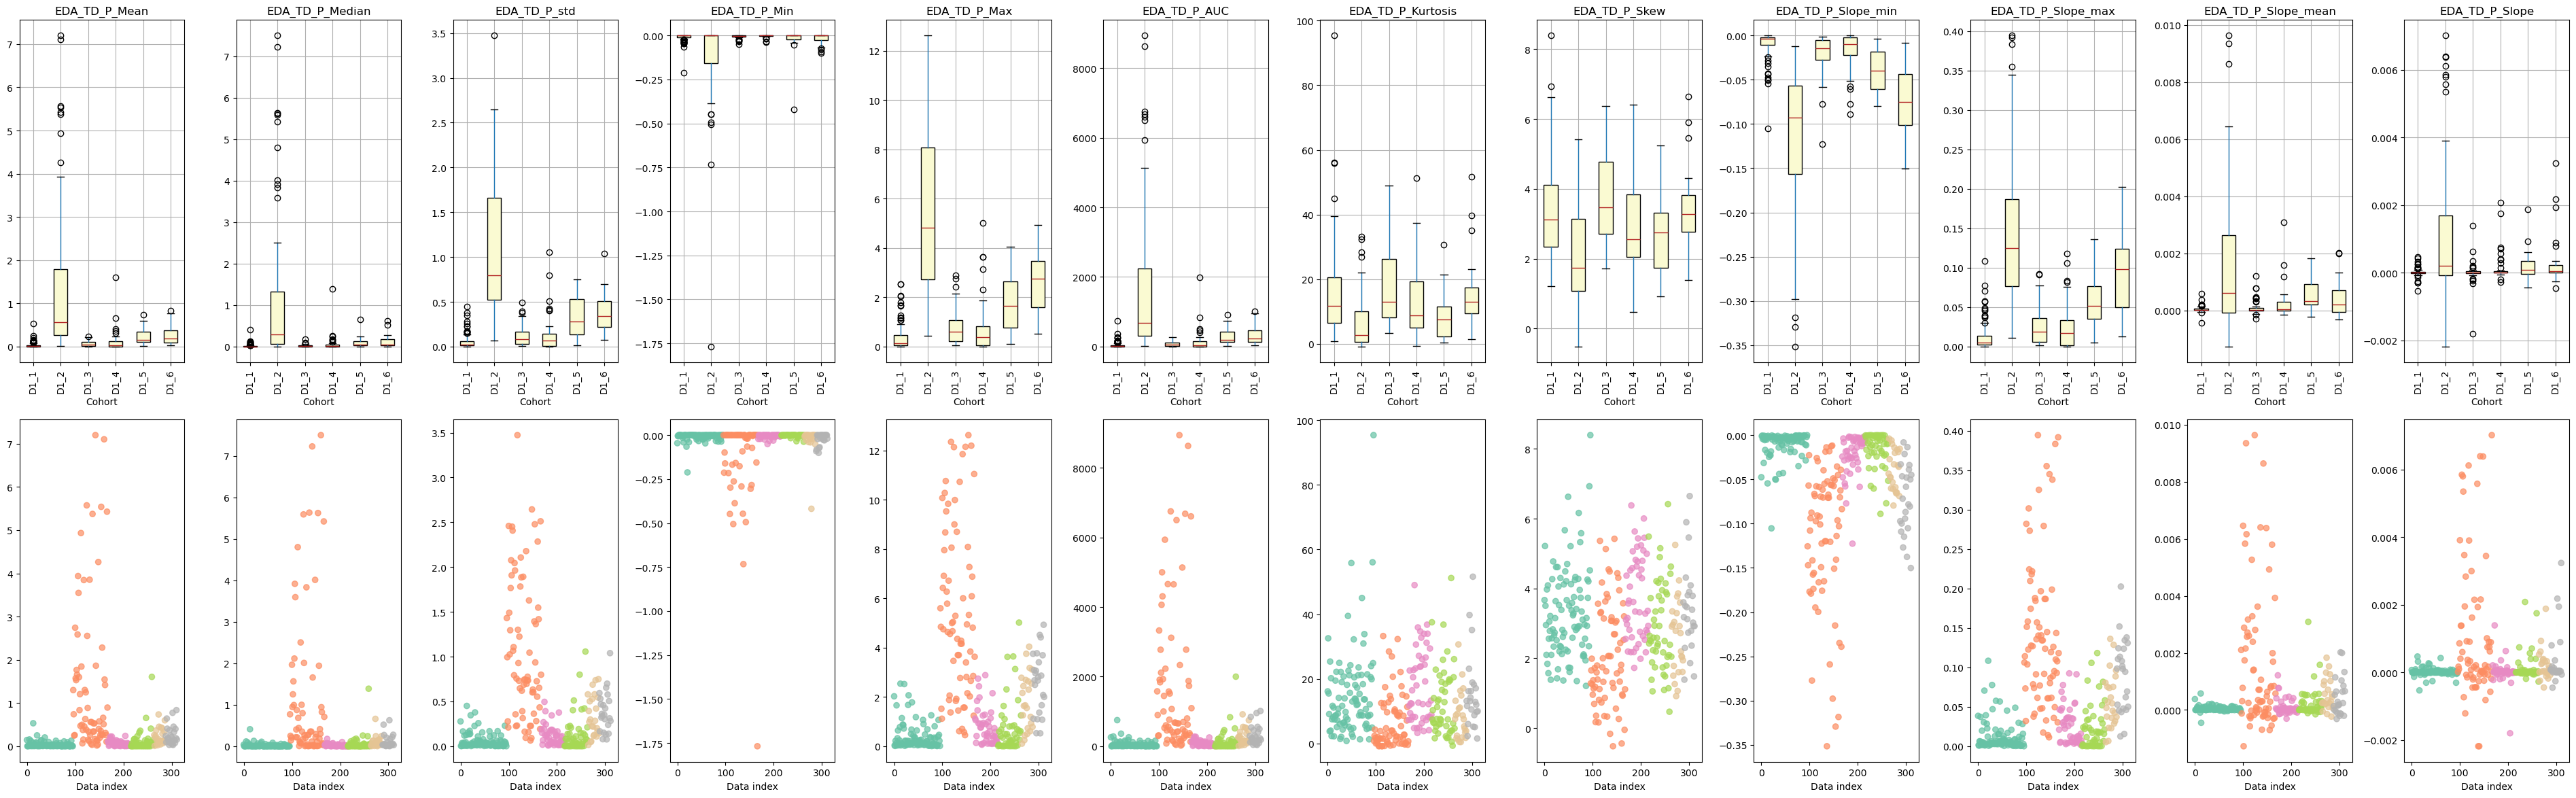

In [53]:

import math

# Build the mapping table
mapping = data[['original_ID', 'raw_data_path', 'Individual']].reset_index(drop=True)

# Choose features
# features = ['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Peaks']
features = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope']

# Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = len(features), figsize = (38, 12), sharey = False, sharex=False)

data.sort_values(['Cohort', 'Round', 'Phase'], inplace=True)
data.reset_index(drop=True, inplace=True)

# # Standardize the numerical data
# scaler = StandardScaler()
# standard_array = scaler.fit_transform(data[features])

# # Convert back to dataframe
# st_data = pd.DataFrame(standard_array, columns = data[features].columns, index = data[features].index)
# st_data = pd.concat([st_data, data['Cohort']], axis=1)

# print(st_data.max())

# Draw a boxplot for each feature, grouped by original_ID
for ax, feat in zip(axes[0], features):
    data.boxplot(
        column = feat,
        by = 'Cohort',
        ax = ax,
        rot = 90,
        patch_artist = True,
        boxprops = dict(facecolor = 'lightgoldenrodyellow'),
        medianprops = dict(color = 'firebrick')
    )
    ax.set_title(f'{feat}')
    ax.set_xlabel('Cohort')
    # ax.set_ylabel(feat)

# Show plot
plt.suptitle('')

for i, col in enumerate(data[features]):
    ax = axes[1][i]
    
    scatter = ax.scatter(
        data.index, 
        data[col], 
        c = data['Cohort'].str[-1].astype(int),
        cmap='Set2',
        alpha=0.7
    )
    
    # ax.set_title(col)
    ax.set_xlabel('Data index')
    # ax.set_yticks(range(0, 6))

plt.tight_layout()
plt.show()

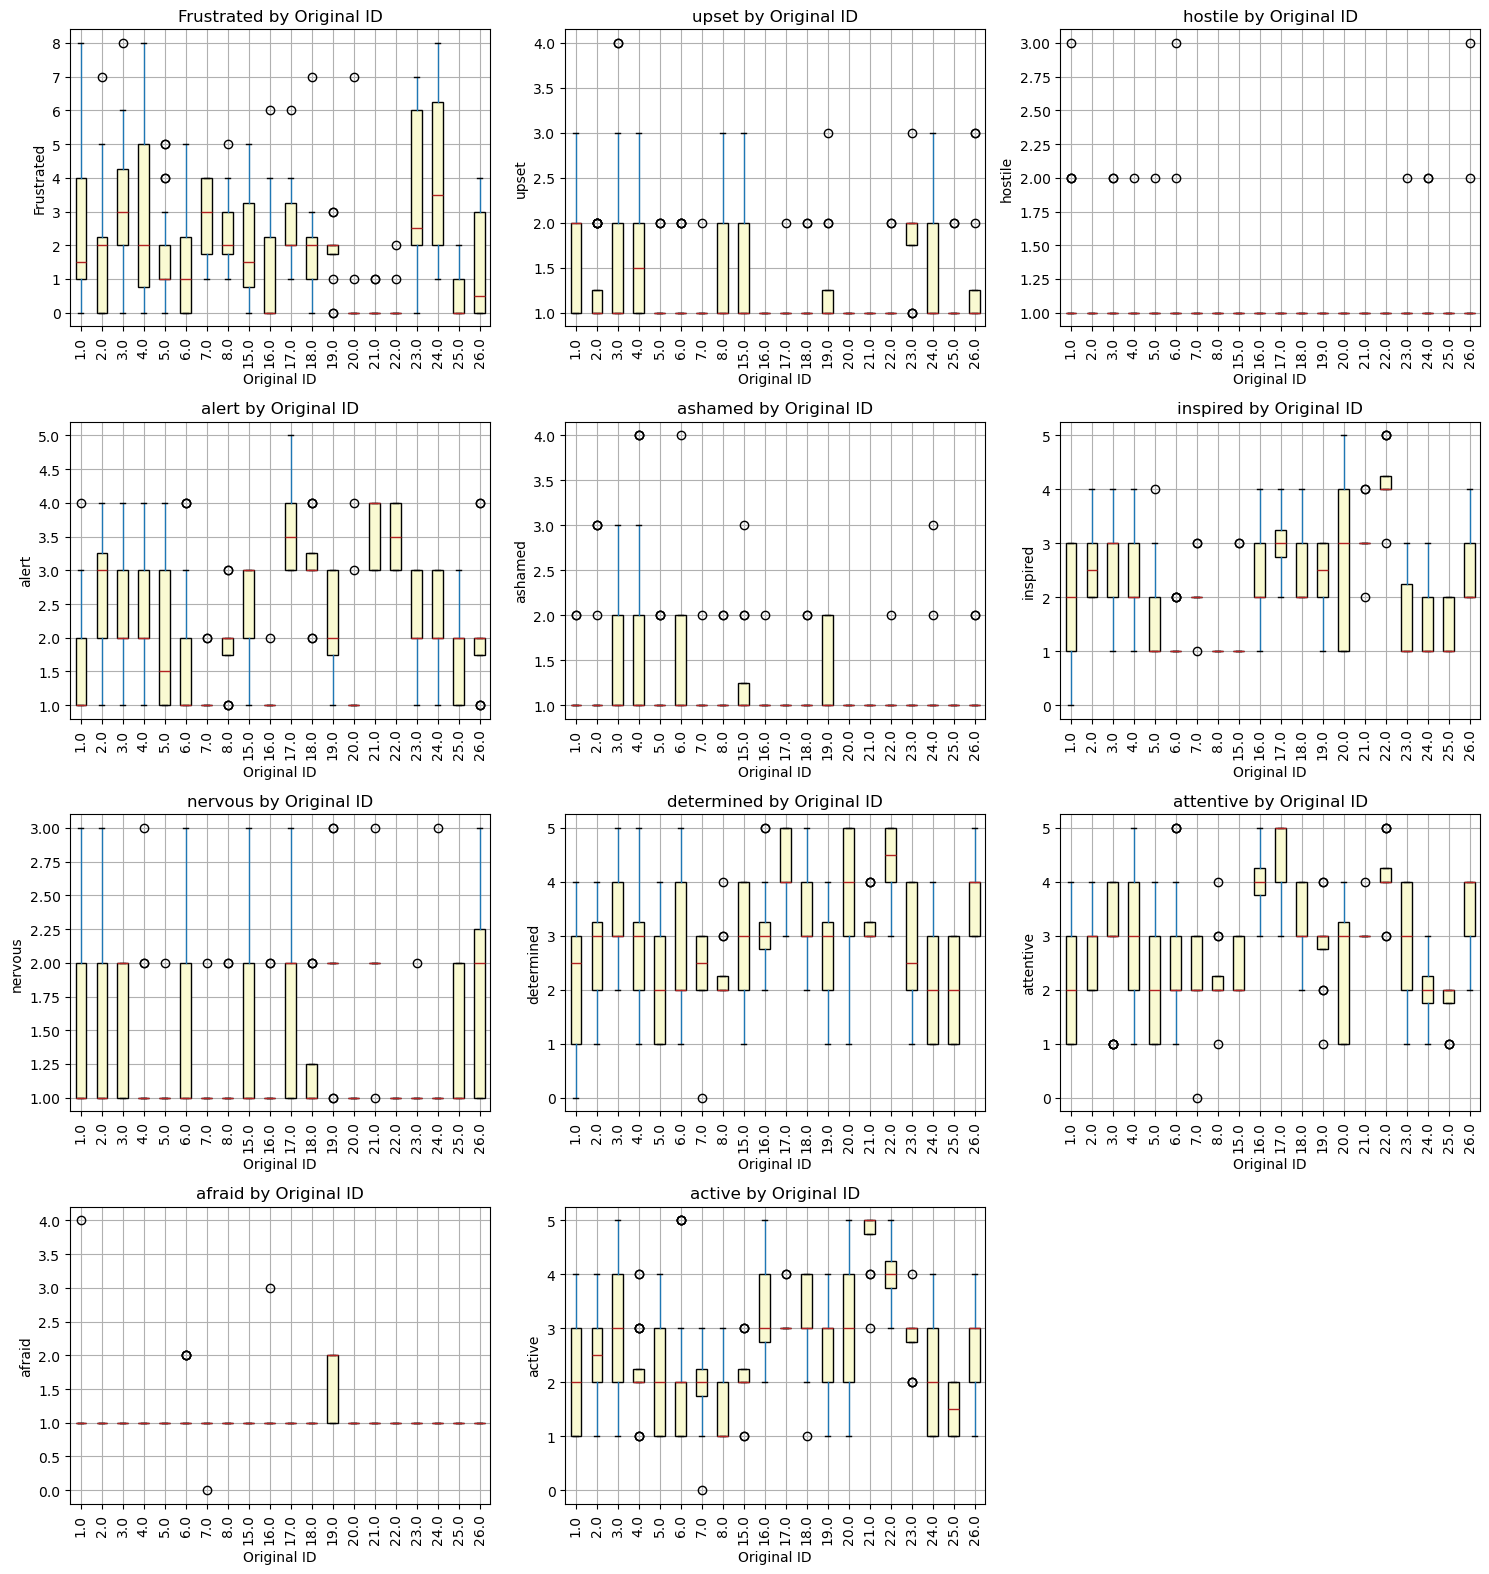

In [ ]:
# Create subplots
n = len(rating_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(
    nrows = rows, ncols = cols, figsize = (cols * 5, rows * 4))
axes = axes.flatten()

# Plot each rating’s boxplot grouped by original_ID
for ax, feat in zip(axes, rating_cols):
    data.boxplot(
        column = feat,
        by = 'original_ID',
        ax = ax,
        rot = 90,
        patch_artist = True,
        boxprops = dict(facecolor = 'lightgoldenrodyellow'),
        medianprops = dict(color = 'firebrick')
    )
    ax.set_title(f'{feat} by Original ID')
    ax.set_xlabel('Original ID')
    ax.set_ylabel(feat)

# Remove any unused axes
for ax in axes[n:]:
    fig.delaxes(ax)

# 7. Tidy up layout and display
plt.suptitle('') 
plt.tight_layout()
plt.show()

#### Find the NaN values in the features

In [116]:
# Count missing values per column
nan_counts_per_row = data.isnull().sum(axis=1)
nan_rows = data[nan_counts_per_row > 0]

print("Missing values by index:")
for idx, cnt in nan_counts_per_row[nan_counts_per_row > 0].items():
    print(f"{idx}: {cnt} \n")

# Columns you want to display
cols = ['original_ID', 'raw_data_path', 'Round', 'Phase', 'Individual', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
row = nan_rows[cols].iloc[0]
print("Information:")
print(' \n'.join(f"{col} = {row[col]}" for col in cols))

Missing values by index:
272: 2 

Information:
original_ID = 18.0 
raw_data_path = dataset/D1_3/ID_4/round_4/phase1 
Round = round_4 
Phase = phase1 
Individual = 23 
EDA_TD_P_RT = nan 
EDA_TD_P_ReT = nan


In [117]:
# Define experimental design feature columns
non_feature_cols = ['Round', 'Phase', 'Individual', 'Puzzler', 'original_ID', 'raw_data_path', 'Team_ID', 'Cohort']